# Practice Session 08: Connected components and k-core decomposition

<font size="+2" color="blue">Additional results: multiple experiments per graph</font>

Name: Mario Muñoz Serrano

Email: mario.munoz01@estudiant.upf.edu

ID: U172951

# 1. The Star Wars graph

The following code just loads the *Star Wars* graph into variable *g*. 

Related to the provided code and the provided data we had to make some changes cause with the provided data we had the following error KeyError: 'long'
Cause 'long' is not among the valid attribute types. This is beacause the type 'long' is not a valid key in the dictionary of attribute types. So we saw that in the latest versions of python long integers and integers were unified inside the type int so we made a piece of code in order to rewrite the graphml file and change attr.type="long" by attr.type="int"

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [ ]:
import io
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

# PRECONDITION: The file "starwars.graphml" must have been uploaded

# Code used in order to rewrite data in a correct format

f = open("starwars.graphml", 'r')
reformat = open("starwars_newformaat.graphml", 'w')

for line in f:
    words = line.split(" ")
    new_line = ''
    for word in words:
        if word == 'attr.type="long"':
            word = 'attr.type="int"'
        new_line += word + " "
    if new_line != '':
        reformat.write(new_line)

    else:
        reformat.write(line)



The number of nodes is: 110
The number of edges is: 444
The number of connected components is: 1







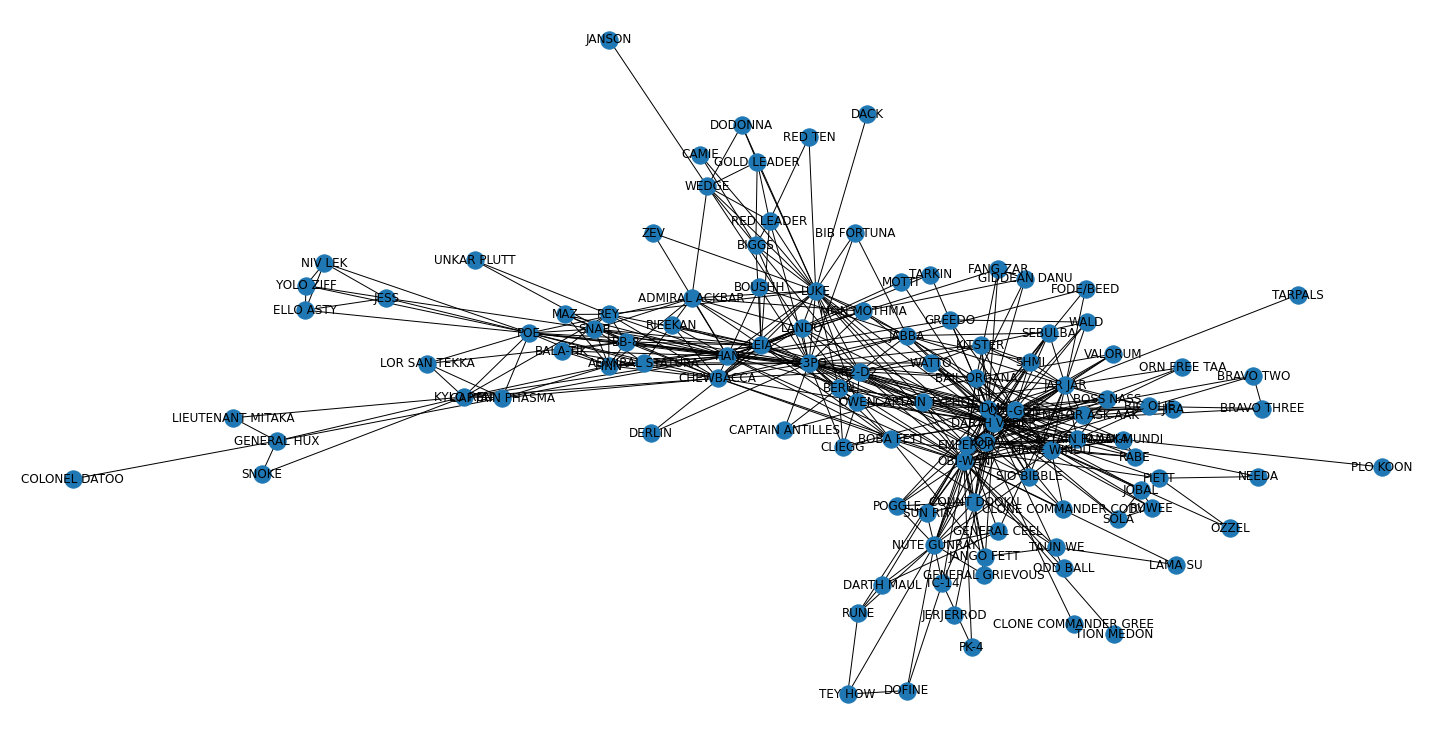

In [ ]:

# PRECONDITION: The file "starwars_newformaat.graphml" must have been generated  using the previous code


# Read the graph in GraphML format
graph_path = "starwars_newformaat.graphml"

# Read the graph in GraphML format
g_in = nx.read_graphml(graph_path)

# Re-label the nodes so they use the 'name' as label
g_relabeled = nx.relabel.relabel_nodes(g_in, dict(g_in.nodes(data='name')))

# Convert the graph to undirected
g = g_relabeled.to_undirected()
print("The number of nodes is: " + str(g.number_of_nodes()))
print("The number of edges is: " + str(g.number_of_edges()))
print("The number of connected components is: " + str(nx.number_connected_components(g)))
print("\n\n\n\n")

# Create a plot of 20x10
plt.figure(figsize=(20,10))

# Layout the nodes using a spring model
nx.draw_spring(g, with_labels=True)

# Display
plt.show()

<font size="+1" color="white">Related with the number of nodes, edges and connected components. The number of nodes is 110, the number of edges is 444 and the number of connected components is 1</font>

# 2. Removing a fraction of edges

In [ ]:
def remove_fraction_edges(g_in, p):
    # Check input is within bounds
    if p < 0.0 or p > 1.0:
        raise ValueError
    
    # Create a copy of the input graph
    g_out = g_in.copy()
    
    # Decide how many edges should be in the output graph
    target_num_edges = int((1.0-p) * g_in.number_of_edges())

    # While there are more edges than desired
    while g_out.number_of_edges() > target_num_edges:
        
        # Remove one random edge
        edge = random.choice(list(g_out.edges()))
        g_out.remove_edge(edge[0], edge[1])
    
    # Return the resulting graph
    return g_out

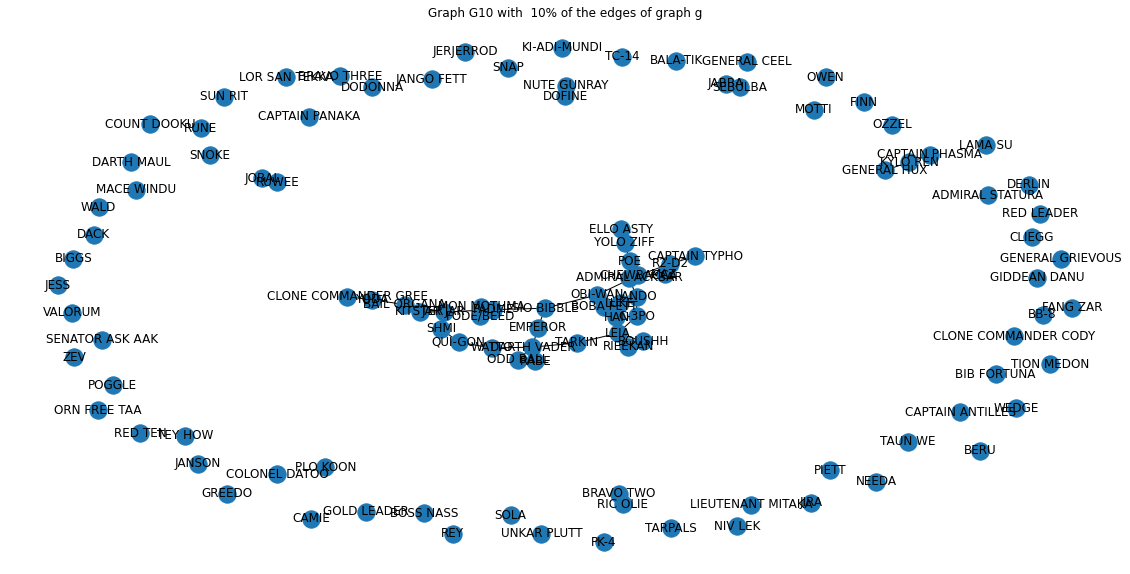

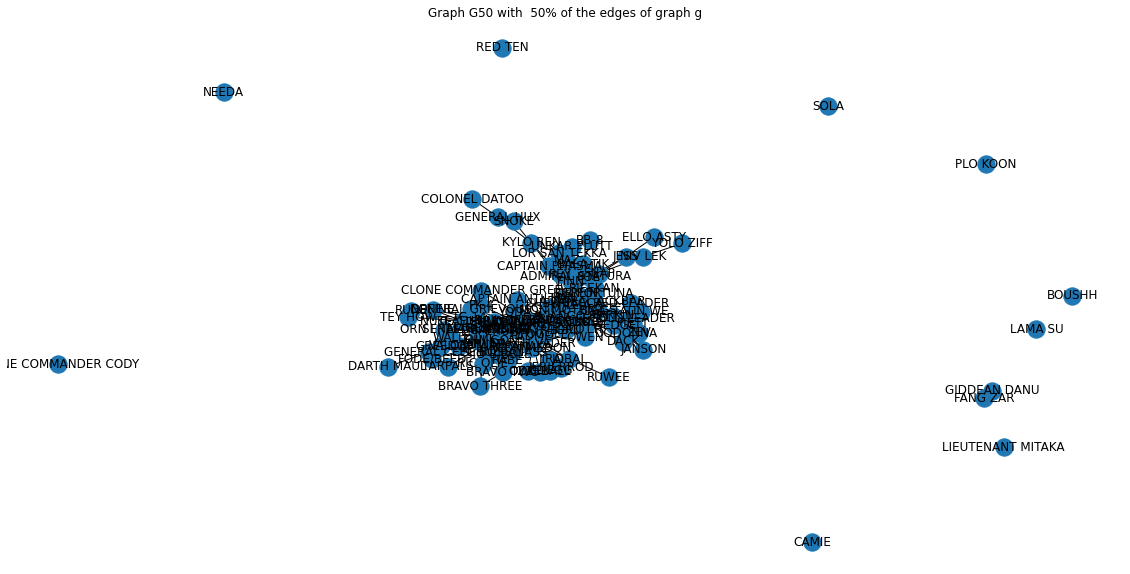

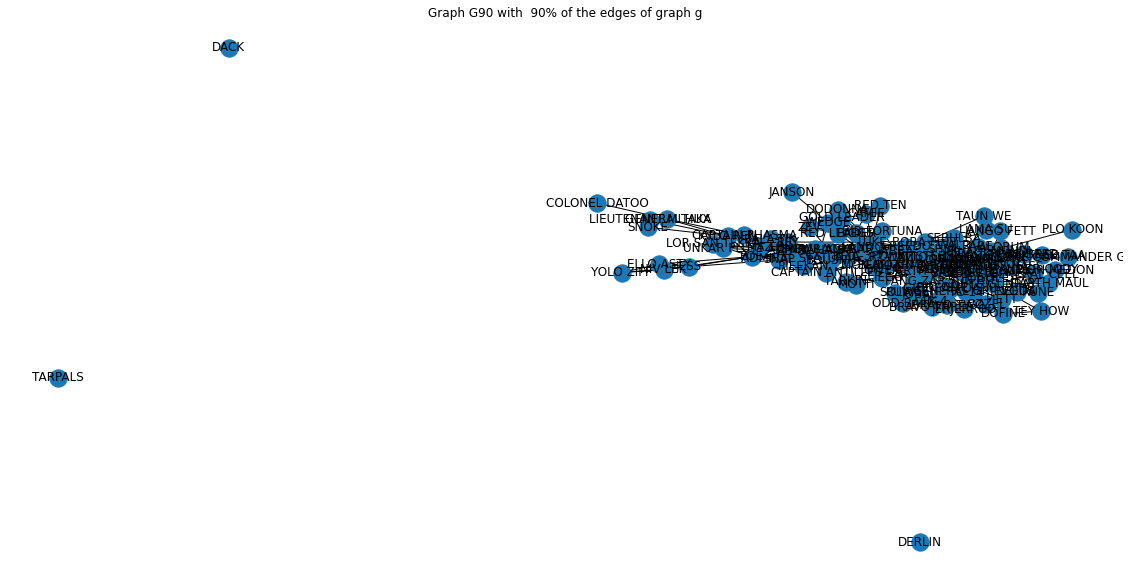

In [ ]:

# PRECONDITION: remove_fraction_edges(g, p) and the graph g must have been defined


g10 = remove_fraction_edges(g, 0.9)
g50 = remove_fraction_edges(g, 0.5)
g90 = remove_fraction_edges(g, 0.1)

#### g10 graph #############################################

# Create a plot of 20x10
plt.figure(figsize=(20,10))

plt.title('Graph G10 with  10% of the edges of graph g')

# Layout the nodes using a spring model
nx.draw_spring(g10, with_labels=True)

# Display
plt.show()

#### g50 graph #############################################
# Create a plot of 20x10
plt.figure(figsize=(20,10))

plt.title('Graph G50 with  50% of the edges of graph g')

# Layout the nodes using a spring model
nx.draw_spring(g50, with_labels=True)
# Display
plt.show()


#### g90 graph #############################################
# Create a plot of 20x10
plt.figure(figsize=(20,10))

plt.title('Graph G90 with  90% of the edges of graph g')
# Layout the nodes using a spring model
nx.draw_spring(g90, with_labels=True)

# Display
plt.show()

<font size="+1" color="white">

In these three graphs with respect to the number of connected components, the number of singletons, and the size of the largest connected components. We see that as the percentage of edges of the original graph, i.e the number of edges increases. 

The number of singeltons decreases and the number of connected components decreases, beacause when we are adding edges we are connecting singeltons i.e creating new connected components but also we are connecting connecting singeltons to connected components and connecting diferent connected componenets and thence reducing the number of connected components. 

Finnaly in terms of the size of the largest connected component as we increase the number of edge we are also increasing the size of the largest connected component.

# 3. Number of connected components

In [ ]:
def assign_component(graph):
    node2componentid = {}

    componentid = 1

    for node in graph.nodes():
        if node not in node2componentid:
            assign_component_recursive(graph, node2componentid, node, componentid)
            componentid += 1
    return node2componentid


def assign_component_recursive(graph, node2componentid, starting_node, componentid):
    node2componentid[starting_node] = componentid

    for neighbor in graph.neighbors(starting_node):
        if neighbor not in node2componentid:
            assign_component_recursive(graph, node2componentid, neighbor, componentid)

In [ ]:
# PRECONDITIONS: The functions assign_component(graph) and 
# assign_component_recursive(graph, node2componentid, starting_node, componentid) must have been implemented
# As well the corresponding libaries must have been imported and the graphs g, g10, g50 and g90 
# must have been genereted executing the previous pieces of code


def count_connected_components(g):
    # Call the function to assign each node to a connected component
    node2componentid = assign_component(g)
    
    # Count the number of distinct values in this assignment
    return len(set(node2componentid.values()))


# Now in order to check if the function works correctly we have used the function nx.number_connected_components(g)
# with different graphs and compared their result with the result of our function  and it is the same. 
# Below you can see the code and the output

print("Using our function count_connected_components(): The number of connected componenets of g is " + str(count_connected_components(g)))
print("The number of connected components of g is: " + str(nx.number_connected_components(g)))
print("\n\n\n\n")
print("Using our function count_connected_components(): The number of connected componenets of g10 is " + str(count_connected_components(g10)))
print("The number of connected components of g10 is: " + str(nx.number_connected_components(g10)))
print("\n\n\n\n")
print("Using our function count_connected_components(): The number of connected componenets of g50 is " + str(count_connected_components(g50)))
print("The number of connected components of g50 is: " + str(nx.number_connected_components(g50)))
print("\n\n\n\n")
print("Using our function count_connected_components(): The number of connected componenets of g90 is " + str(count_connected_components(g90)))
print("The number of connected components of g90 is: " + str(nx.number_connected_components(g90)))
print("\n\n\n\n")

Using our function count_connected_components(): The number of connected componenets of g is 1
The number of connected components of g is: 1





Using our function count_connected_components(): The number of connected componenets of g10 is 71
The number of connected components of g10 is: 71





Using our function count_connected_components(): The number of connected componenets of g50 is 11
The number of connected components of g50 is: 11





Using our function count_connected_components(): The number of connected componenets of g90 is 4
The number of connected components of g90 is: 4







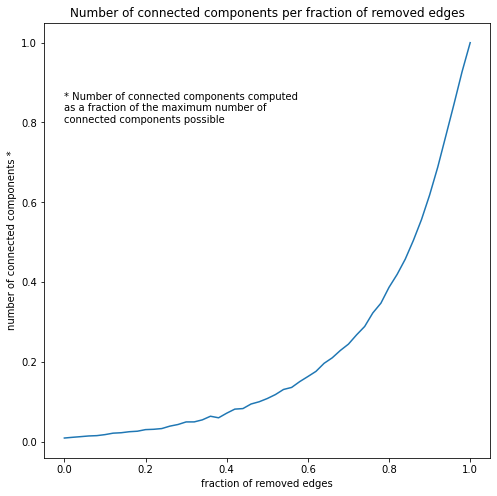

In [ ]:
components_per_fraction = {}

for p in np.arange(0.0, 1.02, 0.02):
  connected_components = 0
  for experiment in range(100):
    reduced_graph = remove_fraction_edges(g, p)
    connected_components += count_connected_components(reduced_graph)
  components_per_fraction[p] = connected_components /100

x_vals = sorted(components_per_fraction.keys())
y_vals = [components_per_fraction[x]/g.number_of_nodes() for x in x_vals]
plt.figure(figsize=(8,8))
plt.plot(x_vals, y_vals)

plt.xlabel("fraction of removed edges")
plt.ylabel("number of connected components *")
plt.title("Number of connected components per fraction of removed edges")
plt.text(0, 0.8, "* Number of connected components computed \nas a fraction of the maximum number of \nconnected components possible")


plt.show()

<font size="+1" color="white">

As expected, in this plot we can see that the number of connected components increases when we are disconnecting more nodes. Cause when we are removing the path that joins two parts of the same connected component we are creating two new connected components from one. And as we are removing paths we are creating new connected components.

# 4. Largest connected component

Write a function `size_largest_connected_component` to compute the size of the largest connected component on a graph. Basically you need to call `assign_component` and then iterate through the nodes, counting how many times you see each *componentid*, and returning the maximum of this.

To obtain the maximum value on a dictionary, e.g., *component_sizes*, you can use `np.max(list(component_sizes.values()))`

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [ ]:
def size_largest_connected_component(g):
    node2componentid = assign_component(g)
    component_sizes = {}
    for (node,componentid) in node2componentid.items():
        if componentid not in component_sizes:
            component_sizes[componentid] = 0
        component_sizes[componentid] += 1
    
    return np.max(list(component_sizes.values()))

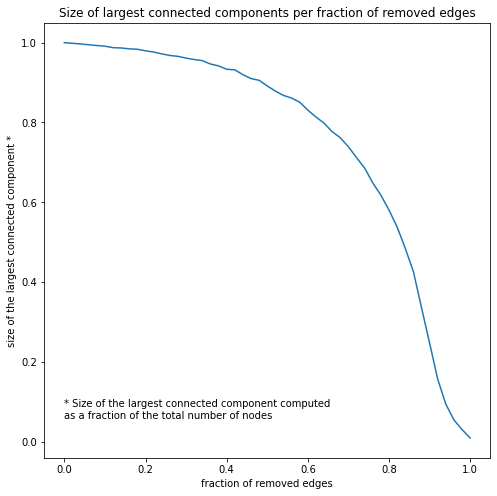

In [ ]:
size_of_largest_component_per_fraction = {}

for p in np.arange(0.0, 1.02, 0.02):
  s_per_fraction = 0
  for experiment in range(100):
    reduced_graph = remove_fraction_edges(g, p)
    size_of_largest_component = size_largest_connected_component(reduced_graph)
    s_per_fraction += size_of_largest_component

  size_of_largest_component_per_fraction[p] = s_per_fraction / 100
  



x_vals = sorted(size_of_largest_component_per_fraction.keys())
y_vals = [size_of_largest_component_per_fraction[x] / g.number_of_nodes() for x in x_vals]


plt.figure(figsize=(8,8))
plt.plot(x_vals, y_vals)

plt.xlabel("fraction of removed edges")
plt.ylabel("size of the largest connected component *")
plt.title("Size of largest connected components per fraction of removed edges")
plt.text(0, 0, "* Size of the largest connected component computed \nas a fraction of the total number of nodes\n\n")

plt.show()

<font size="+1" color="white">

In this plot we can see that this function is a decreasing function that decreases faster when the 75% of the edges are removed. And in order that the largest connected component has the 80% of the nodes we need to remove aprox the 62% of the edges.

# 5. K-core decomposition

Now we will perform a k-core decomposition, using the following auxiliary functions, which you can leave as-is.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [ ]:
def get_max_degree(g):
    degree_sequence = [x[1] for x in g.degree()]
    return(max(degree_sequence))


def nodes_with_degree_less_or_equal_than(g, degree):
    nodes = []
    for node in g.nodes():
        if g.degree(node) <= degree:
            nodes.append(node)
    return nodes

In [ ]:

def kcore_decomposition(graph):

    g = graph.copy()
    max_degree = get_max_degree(g)
 
    node_to_level = {}
    for level in range(1, max_degree + 1):

      # Obtain the list of nodes with degree <= level
      nodes_in_level = nodes_with_degree_less_or_equal_than(g, level)
        
      # Check if this list is empty
      if len(nodes_in_level) == 0:
          break
        
      # If the list is not empty, assign the nodes to the
      # corresponding level and remove the node
      for node in nodes_in_level:
          g.remove_node(node)
        
      node_to_level[level] = nodes_in_level
                
 
    return node_to_level

nodes_by_lavel = kcore_decomposition(g)

levels = sorted(nodes_by_lavel.keys())



print("The characters in the deepest K-core in the graph are: ")
print(''.join(character + "\n" for character in nodes_by_lavel[len(levels)]))

print("The characters in the second deepest K-core in the graph are: ")
print(''.join(character + "\n" for character in nodes_by_lavel[len(levels)-1]))





The characters in the deepest K-core in the graph are: 
LUKE
EMPEROR
YODA
OBI-WAN
C-3PO
PADME
QUI-GON
R2-D2
DARTH VADER

The characters in the second deepest K-core in the graph are: 
HAN
LANDO
LEIA
BAIL ORGANA
JABBA
JAR JAR
CHEWBACCA



<font size="+1" color="white">

As expected. The characters with a greatest k-Core are those who have more presence in the film and thus more relations with other characters and thence a greater node degree.

</font>

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>